# Analyzing Correlations in the NBA | Mahir Piyarali

## Introduction

To start, I was given NBA win data by minute of the game for the 2012, 2013 and 2014 seasons from the website FiveThirtyEight. With the goal to find different correlations, I chose four different datasets to compare to the win data. Because the win percentage data was given by minute of the game, I chose the data from the last minute to serve as the overall winning percentage for each team on any given day. I then used this to make scatterplots with other data to correspond to teams to find any correlations. I chose to compare winning percentage to: total amount of draft picks over the three seasons, total home attendance over the three seasons, the total amount of money each team paid to their highest paid player over three years, and the average free throw percentage per game over the three seasons.

## Packages

In order to do proper analysis on the datasets, I need to use various python packages to assist with the statistics side of things. I use pandas for listing and arrays, matplotlib for the scatter plots, ans then numpy and scipy for the statistics analysis and r-values.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
from scipy import stats


## Overall Preparation

This imports the data from the FiveThirtyEight csv file we were given.

In [55]:
ogdata = pd.read_csv("NBALab/nba.csv")
winpct = ogdata["48"] 
#this isolates the winning percentage in the 48th minute,
#which equates to the team's overall winning percentage because their odds of winning
#at the end of the game equals their odds of winning the game

names = []
teamname = data["team"]
for team in teamname:
    names.append(team)
#this loop makes a list of the team names, so we can then use this to graph and labels on the graph

## Analysis 1

### Draft Picks and Win Percentage

Every year in the NBA (and other sports), there is a draft in which teams select players leaving the college level destined for a career in the pros. Traditionally, the worse a team does, a "better" or higher pick they recieve. This means that the worst team gets the first pick and so on. The first pick is desirable because you can then choose from ALL players, and can choose the best available player. The NBA, however, does this differently. They do a lottery system. Meaning that they choose which team gets to pick when by drawing team names out of a container. The worse a team does, the more entries into the lottery they recieve, which then gives them a higher chance of getting a better pick. This also means that a team can have multiple picks in any given round, but also means that some teams may not get to pick at all. In this analysis, I compare the total amount of draft picks over the 2012, 2013 and 2014 seasons to the win percentage. To see if drafting more leads to more wins. Or if the better a team does, the fewer picks they get. I recieved the draft pick data from basketball-reference.com, and created a CSV file with the amount of picks per year per team in individual columns, and then a final column with the total amount of draft picks over the three years.

###### Data Modeling

Using pandas, scipy and matplotlib, we are able to create a scatter plot and perform the pearson test to find the r-value, rsquared-value and the slope of the line of best fit. The data is modeled simply in a scatter plot and the code runs the regressional computing, so all we need is a few lines of code to do all the math for us.

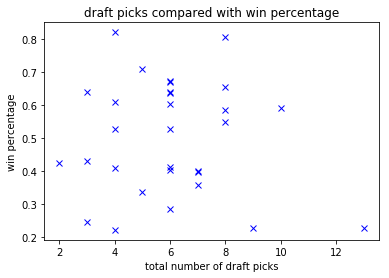

r: -0.0763540301866 , rsquared: 0.00582993792574 , slope: -0.00564075949367


In [56]:
draftpicks = pd.read_csv("NBALab/draft_info.csv")
#draftpicks[:] statement in pandas package that prints the full CSV in a clean format, used for organization
totalpicks = draftpicks["total picks"]
#we're only interested in the total picks over the course of the three years, this isolates that column and appends it to a new list
plt.plot((totalpicks),(winpct), "bx")
#picks on x axis, win % on y axis, choosing a scatter plot with blue x markings
plt.xlabel("total number of draft picks")
plt.ylabel("win percentage")
plt.title("draft picks compared with win percentage")
plt.show()
#using scipy stats to find the slope, r-value and r-squared value
x = totalpicks
y = winpct
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value,", rsquared:", r_value**2, ", slope:", slope)

It appears that there is no correlation to the amount of draft picks and the win percentage of a team. The slope is slightly negative, implying that there is a somewhat miniscule trend that shows that the better a team does, the fewer overall draft picks they recieve.

## Analysis 2

### Home Attendance and Win Percentage

Throughout sports, there's the concept of home-field advantage. This is because the home fans can tend to help support and influence their team to play better, and can get in the heads of the opposing, visiting team. This next analysis studies the connection between winning and home attendance. The data is from ESPN's NBA attendance reports, and compares the TOTAL home attendance over the three seasons with the winning percentage of the teams. A note, however, is that the data of wins comes from both home and away games, which very well may negate the affects from home-court advantage when the team is playing an away game. The CSV file has total home attendence in each column, with a final column being the total attendance from the three years. 

##### Data Modeling

The data modeling method is the same as Analysis 1

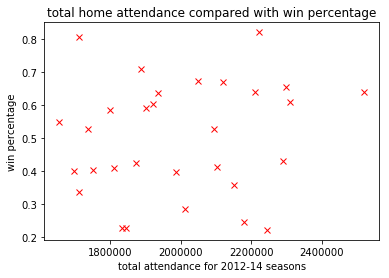

r: 0.139650237563 , rsquared: 0.0195021888513 , slope: 1.07030376584e-07


In [57]:
attendance = pd.read_csv("NBALab/attendance_info.csv")
#attendance[:]
totalatd = attendance["total atd"] #we are only using the total attendance over 3 seasons, so this isolates that total attendance column and appends into a new list
#totalatd[:]
#this next plot will total home attendance to win percentage
#print(totalatd)
plt.plot((totalatd),(winpct), "rx")
#attendance on x axis, win percentage on y axis, choosing a scatterplot with red x markings
plt.xlabel("total attendance for 2012-14 seasons")
#plt.xlabel(teamname)
plt.ylabel("win percentage")
plt.title("total home attendance compared with win percentage")
plt.show()
x = totalatd
y = winpct
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value, ", rsquared:", r_value**2, ", slope:", slope)

This shows that there is very little to no correlation between total home attendance and the win percentage of a team. There is a very slightly positive slope, showing that there is a slight increase in wins when there are more people at home games, however this is extremely minimal.

## Analysis 3

### Free Throw Percentage and Win Percentage

In basketball, when a player gets fouled while shooting they get to take free throws, each worth one point. Due to the sheer amount of fouls in a given game, converting these free throws into points for the team can make or break a game for a team. For this final analysis, I chose to compare the free throw percentage of each team over the course of the three seasons, to see if making all of these shots can really help win a game.

###### Data Modeling

The data modeling method is the same as Analysis 1 and 2

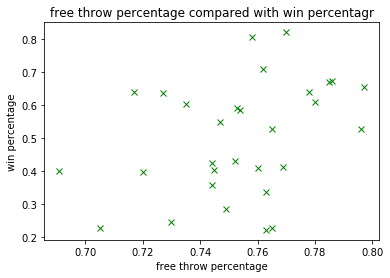

r: 0.368113771499 , rsquared: 0.135507748768 , slope: 2.49516641211


In [58]:
#the last data set i'm going to compare to the winning percentage of the team will be the team's
#freethrow percentage over the course of the three years
ftpct = pd.read_csv("NBALab/ftpct.csv")
#ftpct[:]
avpct = ftpct["avgft"]
#print(avpct)
#this next plot will show correlation between average ft percentage for the three years
#and the winning percentage of the teams
plt.plot((avpct),(winpct),"gx")
#free throw perent on x axis, win percentage on y axis, scatter plot with green x markings
plt.xlabel("free throw percentage")
plt.ylabel("win percentage")
plt.title("free throw percentage compared with win percentagr")
plt.show()
x = avpct
y = winpct
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value, ", rsquared:", r_value**2, ", slope:", slope)

This regressional analysis shows that there is, in fact, some positive correlation between free throw percentage and winning percentage. Meaning that the more free throws you are able to convert into points, the higher your chance of winning the game is. There also is a pretty positive slope, further confirming that more free throws made can lead to more wins.

## Final Results/Analysis

### Analysis 1, Draft Picks and Win Percentage

##### Breaking it Down
This comparison was between overall draft picks and win percentage. The scatter plot and regressional analysis show that there is almost no correlation between the total amount of draft picks a team has and their success in-game. This also makes some sense, as when looking at how the NBA is structured with their draft, there's a lottery system. This leads to every team getting a chance at every draft pick. So, the best team could have the first pick and the worst could have the second pick, and the best team could have 4 picks one year and the worst could have none. This randomization makes it much more entertaining for spectators compared to a traditional draft like in football or baseball, but it also makes it margnally unfair depending on circumstance. There is also a negative slope, however slightly, which means that in theory the fewer draft picks you have, the better you do in the games. This, too, makes some sense because the better a team does, the fewer entries they recieve into the lottery system, and therefore, the fewer draft picks they get per season.

The r value was extremely low, meaning that there is no effective correlation between the two.

##### Biases, unanswered questions, misc info and more
One source of bias that I find important to mention in this data set is that the data doesn't account for the order of the draft picks, only how many picks each team got in total. This means that there are chances that a team got 4 picks in a row, but they were all "bad" or late picks, with fewer good players available. Or that a team only got one pick, but it was the first overall. And the player they choose with this first overall pick could actually help the team win more games compared to all four of the "worse" players chosen in the later round.

This data set also produces some unanswered questions and places in which we could dig deeper. Like mentioned in the bias, the data set only includes total draft picks. I think something that would be interesting to see would be how important draft position is. Do better picks really produce more wins?

Another thing I would like to mention is that in hindsight, it looks like winning percentage will effect the amount of draft picks more than the other way around. This is because the better a team does, the fewer entries in the lottery they recieve and overall, the fewer amount of picks they will get. Though subjective, this makes sense.

### Analysis 2, Home Attendance and Win Percentage

##### Breaking it Down
This comparison was to test the effectiveness of the concept of home-field advantage. The phenomenon of home-field advantage is one that is widely-accepted as true in the sports world. Playing in front of your home crowd can help a team feel empowered and supported, which then could lead to better performance on the field/court. The way I decided to test this was to take the total amount of home attendance over the course of the three seasons, and then compare it to the win percentage over the course of the three seasons. After making the scatter plot and running the linear regression, we see that there is, in fact, no correlation between home attendance and total winning percentage.

There is such a small r-value, that we can conclude that there is no correlation between home attendance and total win percentage.

##### Biases, unanswered questions, misc info and more
Though there isn't any real correlation between home attendance and total wins, the story doesn't stop yet. I think there is a lot of bias in this comparison. First of all, a more accurate test would have been to compare home attendance ONLY to home winning percentage. This is because there's a chance that the wins you get from home could be negated or countered by your away games, and the disadvantage of playing an away game. This would have been more accurate if the comparison was only with winning percentage at home.

Additionally, something else to consider is the amount of people attending a game could be subjective, and have outside influences. Some stadiums can't hold as many people, meaning that the overall home attendance would be lower. Another way to make this more accurate would be to compare the home attendance capacity percentage to the win percentage.

There is another source of bias, too. With collecting solely the total amount of people attending the game, we miss out on some important influences. The win percentage data is an average over the three seasons, but it's being compared to the total sum of attendance. There may have been one season with lots of promotions, bringing in fans. These select games skew the data set by making it seem like more people show up than in reality. Another way to make this comparison more accurate would be to compare to the average number of attendees, versus the total.

Because this comparison and analysis was done somewhat innacurately, it raises some questions. Mainly, what's the correlation between solely home win percentage and home attendance. Comparing to total win percentage doesn't accuratly measure if the phenomenon of home-field advantage is real.

### Analysis 3, Free Throw Percentage and Win Percentage

##### Breaking it Down
This comparison was to test the influence that the free throw has on the results of a game. In basketball, when a player shoots and gets fouled, they get "free throws" each worth one point. Because there are so many fouls in a single game, it begs the question of how important convering these shots into points really is. And if converting more of these single-point shots can help swing the odds into the favor of one team or the other.

After making the scatter plot and the regressional analysis, we can see that there is actually some correlation between the two. With an r-value of .36, it's not insanely strong, but it's enough for us to see that it's more than a fluke. Plus, with a positive slope, it implies that the more free throws one makes, the higher their team's chances of winning the game are.

##### Biases, unanswered questions, misc info and more
Unlike the other two tests done in this lab, there doesn't appear to be many biases that could have skewed the accuracy of this dataset and test. The test uses the average free throw percentage for each team over the course of the three seasons. This means it takes into account an equal amount of home and away games, which may not skew the results. One thing that would be interesting to follow up on is to see the average amount of points produced by these free throws and compare it to the percentage of the original shot going in. Depending on where you get fouled, the player gets 2 or 3 shots. Say the average amount of points produced from 2 free throws is 1.3 (wild number, is wrong, used for example purpose). We could compare that to the average chance of a 2-point shot going in. To see if getting fouled on every shot is more favorable. That would be interesting to look at.

Another interesting piece of information about free throw percentage and wins is that, when making March Maddness brackets for college basketball, ESPN reccomends choosing teams with higher free throw percentages to advance. This is because near the end of the game, teams will intentionally foul to stop the clock as you can't call timeouts on defense. If a team is to be able to get points in return for the opposing team stopping the clock, it makes it so much harder to win the game.

## References, External Sources

### People
For this lab, I recieved help from Ms. Sconyers with the coding side, as well as being a second eye to see why some code wasn't working

### Citations for Sources
##### Draft pick info comes from draft reports from the website Basketball Reference:
2012 draft: https://www.basketball-reference.com/draft/NBA_2012.html
2013 draft: https://www.basketball-reference.com/draft/NBA_2013.html
2014 draft: https://www.basketball-reference.com/draft/NBA_2014.html
##### Attendance info comes from ESPN's attendance reports:
2012-2013 report: http://www.espn.com/nba/attendance_year/2012
2013-2014 report: http://www.espn.com/nba/attendance_year/2013
2014-2015 report: http://www.espn.com/nba/attendance_year/2014
##### Free throw percentages come from the season summaries from the website Basketball Reference:
2012-2013 summary: https://www.basketball-reference.com/leagues/NBA_2013.html
2013-2014 summary: https://www.basketball-reference.com/leagues/NBA_2014.html
2014-2015 summary: https://www.basketball-reference.com/leagues/NBA_2015.html

##### All data was put into CSV files created by me in Microsoft Excel with a healthy amount of copy and paste, files are available via email.

## Final Results
### Amount of draft picks and win percentage: r = -0.076, NO CORRELATION
### Total home attendance and win percentage: r = 0.139, NO CORRELATION
### Free throw percentage and win percentage: r = 0.368, SOME CORRELATION